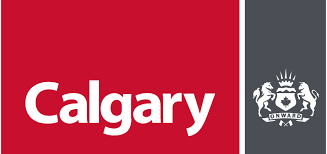
# LOCATION RECOMMEDATION FOR THE CONSTUCTION OF A NEW AMUSEMENT PARK IN CALGARY, ALBERTA, CANADA.

Analyzing different neighbourhoods in Calgary to determine the best location for a new amusement park

##### Completed in partial completion of IBM's Data Science Professional Certification - OGUNDIPE OMOTOKE AYOMIDE

## Introduction

When visiting a new environment or travelling to another region, province, or country on vacation, one of the major places we all look out for are places to have fun. A great place to have fun for both children, teenagers and adults is an amusement park. An amusement park a is large outdoor area with fairground rides, shows, refreshments, games of chance or skill, and other entertainments. An amusement park consists of roller coasters, water slides, carousels, ferris wheel, bumper cars etc. The location of an amusement park greatly determines how much revenue it would generate. According to worldatlas.com and wikipedia, Calgary is the 4th largest city in Canada by population, with the province of Alberta having the third largest GDP in Canada, making it a profitable place to build a new amusement park. There are a few amusement parks in Calgary with Calaway Park being one of the most popular amusement parks. Potential investors would benefit greatly in investing in building a new amusement park in Calgary, which could potentially become the center of attraction for the residents of Calgary, Canadians and international tourists.

One of the biggest challenges in the construction of a new amusement park is how to make an informed decision in selecting a location for the amusement park. Luckily, with Data science tools, we can observe different parameters and conduct an analysis to help determine the best location for our theme park. The most important thing to consider when analyzing data is asking the right questions to provide the best insights!. So what are the factors that determines the best location for a new amusement park ?

#### Key questions

1. From available data, is there a relationship between population and entertainment venues in various neighbourhoods
2. what is the relationship between current entertainment venues and number of restaurants in various neighbourhoods
3. Are entertainment venues closer to the city center ?
4. Are entertainment venues located closer to more populated areas or less populated areas

These questions are based on various internet research that implies there is a relationship between amusement park location with restaurant availability, population, available utilities, etc. More information on factors to consider when finding a location to construct a new amusement park. 

Link 1: http://www.interthemepark.com/where-to-build.html

Link 2: https://architecturaldesignmanagement.wordpress.com/2012/11/22/things-to-consider-when-building-an-amusement-park/#:~:text=It%20should%20be%20well%20decorated,children%20as%20well%20as%20adults.

Link 3:http://maps.unomaha.edu/Peterson/gis/Final_Projects/2003/Altman/final.html

This project aims to observe these information and analyze data in order to validate these relationships and suggest the best location to build an amusement park from the various neighbourhoods in Calgary

#### Data requirements

1 what is the Neighbourhood's population

2 What is the nature of the neighbourhood; is it residential or industrial 

3 How many entertainment venues are in each neighbourhood ?

4 What is the number of restaurants in each neighbourhood?

#### Description of Data

The data used in this project is obtained from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary 

This wikipedia page contains a table containing the list of all neighbourhoods in Calgary, with useful information such as; population, sector, type, area, etc. The data is scrapped using the beautiful soup library, and using geopy, the latitude and longitude is obtained. Also, Four square API is used in obtaining useful information such as restaurant and other entertainment venues in each neighbourhood, in order for analysis to determine the best location for a new amusement park. Using packages such as numpy, matplotlib, folium, pandas, and more, an analysis and visualization of the data would be carried out in order to determine the best neighbourhood to situate a new amusement park.

#### Reasons for Data selection

Entertainment venues: The reason for selecting entertainment venues is to analyze and observe each neighbourhood's relationship with other sources of entertainment. A neighbourhood with a high number of entertainment venues would generally attract people. Establishing a new amusement park in a location with a high population and other entertainment sources would generally set the business up for success. This is because people who would visit other entertainment venues would be attracted to an amusement park that is within a close vicinity. Entertainment venues includes; theme parks, zoos, art theatres, movie theatres, stadiums, museums, etc.

Restaurant: As entertainment venues attract people to a location, so the restaurants. Tourists or residents of a particular neighbourhood are known to be interested in exploring new places to try different kind of cuisines/food. A neighbourhood with a large number of restaurants already attracts people. Situating an amusement park in a location with a high number of people would generally be a plus for an amusement park.

Entertainment, restaurant, and population data are the major factors that can help in identifying the best place to locate a new amusement park.

## Data collection and preparation

#### Step 1: Loading all necessary libraries

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
#!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# open the url using urllib.request and put the HTML into the page variable
import urllib.request

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup


print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Libraries imported.


#### Step 2: Obtaining the Neighbourhood data from Wikipedia using Beautiful Soap and urllib

In [2]:
#Loading the url 
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary"
page = urllib.request.urlopen(url)

In [3]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
#print (soup.prettify())

In [4]:
soup.title
soup.title.string

'List of neighbourhoods in Calgary - Wikipedia'

In [5]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")
#all_tables

In [6]:
right_table=soup.find('table', class_='wikitable sortable')
#right_table

In [7]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]
K=[]
L=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==12:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))
        J.append(cells[9].find(text=True))
        K.append(cells[10].find(text=True))
        L.append(cells[11].find(text=True))

In [8]:
import pandas as pd
df=pd.DataFrame(A,columns=['Neighbourhood'])
df['Quadrant']=B
df['Sector']=C
df['Ward']=D
df['Type']=E
df['Population Rank']=F
df['Population']=G
df['Population 11']=H
df['Percentage change']=I
df['Dwellings']=J
df['Area_size']=K
df['Population density']=L


df.head()

Neighbourhood Quadrant     Sector Ward         Type  \
0                     Abbeydale    NE/SE  Northeast   10  Residential   
1                        Acadia       SE      South    9  Residential   
2  Albert Park/Radisson Heights       SE       East   10  Residential   
3                      Altadore       SW     Centre   11  Residential   
4              Alyth/Bonnybrook       SE     Centre    9   Industrial   

  Population Rank Population Population 11 Percentage change Dwellings  \
0              82      5,917         5,700               3.8     2,023   
1              27     10,705        10,615               0.8     5,053   
2              75      6,234         6,217               0.3     2,709   
3              39      9,116         8,907               2.3     4,486   
4             208         16            17              −5.9        14   

  Area_size Population density  
0       1.7            3,480.6  
1       3.9            2,744.9  
2       2.5            2,493.6  
3       2.9            3,143.4  
4       3.8                4.2

Selecting desired data: 'Neighbourhood','Quadrant','Sector','Type','Population','Area_size'

In [9]:
df = df[['Neighbourhood','Quadrant','Sector','Type','Population','Area_size']]

In [10]:
df.head()

Neighbourhood Quadrant     Sector         Type Population  \
0                     Abbeydale    NE/SE  Northeast  Residential      5,917   
1                        Acadia       SE      South  Residential     10,705   
2  Albert Park/Radisson Heights       SE       East  Residential      6,234   
3                      Altadore       SW     Centre  Residential      9,116   
4              Alyth/Bonnybrook       SE     Centre   Industrial         16   

  Area_size  
0       1.7  
1       3.9  
2       2.5  
3       2.9  
4       3.8

#### Step 3: Cleaning the data

Removing missing values

In [11]:
#Using a for loop to identify missing values (False means there is a value there ie no missing values exist)
for column in df.isnull().columns.values.tolist():
    print(column)
    print (df.isnull()[column].value_counts())
    print("")

Neighbourhood
False    257
Name: Neighbourhood, dtype: int64

Quadrant
False    253
True       4
Name: Quadrant, dtype: int64

Sector
False    253
True       4
Name: Sector, dtype: int64

Type
False    257
Name: Type, dtype: int64

Population
False    255
True       2
Name: Population, dtype: int64

Area_size
False    255
True       2
Name: Area_size, dtype: int64



In [12]:
# simply drop whole row with NaN in column
df.dropna(subset=["Quadrant"], axis=0, inplace=True)
df.dropna(subset=["Sector"], axis=0, inplace=True)

df.dropna(subset=["Population"], axis=0, inplace=True)
df.dropna(subset=["Area_size"], axis=0, inplace=True)

# reset index, because we droped 4 rows
df.reset_index(drop=True, inplace=True)
df.head()


Neighbourhood Quadrant     Sector         Type Population  \
0                     Abbeydale    NE/SE  Northeast  Residential      5,917   
1                        Acadia       SE      South  Residential     10,705   
2  Albert Park/Radisson Heights       SE       East  Residential      6,234   
3                      Altadore       SW     Centre  Residential      9,116   
4              Alyth/Bonnybrook       SE     Centre   Industrial         16   

  Area_size  
0       1.7  
1       3.9  
2       2.5  
3       2.9  
4       3.8

In [13]:
df.shape

(251, 6)

In [14]:
df.tail()

Neighbourhood Quadrant  Sector         Type Population  \
246                Willow Park       SE   South  Residential      5,229   
247               Windsor Park       SW  Centre  Residential      4,126   
248  Winston Heights/Mountview       NE  Centre  Residential      3,891   
249                   Woodbine       SW   South  Residential      9,131   
250                  Woodlands       SW   South  Residential      6,201   

    Area_size  
246       3.4  
247       1.3  
248         3  
249       3.2  
250       2.8

In [15]:
df['Neighbourhood'] = 'Calgary, ' + df['Neighbourhood'].astype(str)
df.head()

Neighbourhood Quadrant     Sector         Type  \
0                     Calgary, Abbeydale    NE/SE  Northeast  Residential   
1                        Calgary, Acadia       SE      South  Residential   
2  Calgary, Albert Park/Radisson Heights       SE       East  Residential   
3                      Calgary, Altadore       SW     Centre  Residential   
4              Calgary, Alyth/Bonnybrook       SE     Centre   Industrial   

  Population Area_size  
0      5,917       1.7  
1     10,705       3.9  
2      6,234       2.5  
3      9,116       2.9  
4         16       3.8

#### Step 4: Obtaining the coordinates of Neighbourhoods

In [16]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store latitude and longitude of values of Neighbourhood column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate of a given Neighbourhood 
def findGeocode(Neighbourhood): 
       
    # try and catch is used to overcome the exception thrown by geolocator using geocodertimedout   
    try: 
          
        # Specify the user_agent as your app name it should not be none 
        geolocator = Nominatim(user_agent="pelican") 
          
        return geolocator.geocode(Neighbourhood) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(Neighbourhood) 

Each value from city column will be fetched and sent to function find_geocode    

In [17]:
# each value from city column will be fetched and sent to function find_geocode    
for i in (df["Neighbourhood"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)

In [18]:
# now add this column to dataframe 
df["Longitude"] = longitude 
df["Latitude"] = latitude 
  
df.head()

Neighbourhood Quadrant     Sector         Type  \
0                     Calgary, Abbeydale    NE/SE  Northeast  Residential   
1                        Calgary, Acadia       SE      South  Residential   
2  Calgary, Albert Park/Radisson Heights       SE       East  Residential   
3                      Calgary, Altadore       SW     Centre  Residential   
4              Calgary, Alyth/Bonnybrook       SE     Centre   Industrial   

  Population Area_size   Longitude   Latitude  
0      5,917       1.7 -113.929413  51.058836  
1     10,705       3.9 -114.055587  50.968655  
2      6,234       2.5 -113.990195  51.044845  
3      9,116       2.9 -114.100756  51.015104  
4         16       3.8 -114.024294  51.016669

As we can see, the coordinates of each neighbourhood has been appended to the dataframe

In [19]:
#Using a for loop to identify missing values (False means there is a value there ie no missing values exist)
for column in df.isnull().columns.values.tolist():
    print(column)
    print (df.isnull()[column].value_counts())
    print("")

Neighbourhood
False    251
Name: Neighbourhood, dtype: int64

Quadrant
False    251
Name: Quadrant, dtype: int64

Sector
False    251
Name: Sector, dtype: int64

Type
False    251
Name: Type, dtype: int64

Population
False    251
Name: Population, dtype: int64

Area_size
False    251
Name: Area_size, dtype: int64

Longitude
False    237
True      14
Name: Longitude, dtype: int64

Latitude
False    237
True      14
Name: Latitude, dtype: int64



In order to view the neighbourhoods without Longitude and Latitude

In [20]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Neighbourhood Quadrant     Sector           Type  \
31             Calgary, CFB Currie       SW       West    Residential   
32   Calgary, CFB Lincoln Park PMQ       SW       West    Residential   
57       Calgary, Douglasdale/Glen       SE  Southeast    Residential   
165       Calgary, Residual Ward 1    NW/SW      West/  Residual Area   
166       Calgary, Residual Ward 2       NW     North/  Residual Area   
167       Calgary, Residual Ward 3    NE/NW     North/  Residual Area   
168       Calgary, Residual Ward 5       NE  Northeast  Residual Area   
169       Calgary, Residual Ward 6       SW       West  Residual Area   
170       Calgary, Residual Ward 9       SE      East/  Residual Area   
171      Calgary, Residual Ward 10    SE/NE       East  Residual Area   
172      Calgary, Residual Ward 12       SE  Southeast  Residual Area   
173      Calgary, Residual Ward 13       SW      South  Residual Area   
174      Calgary, Residual Ward 14    SE/SW      South  Residual Area   
194            Calgary, Section 23       SE  Southeast     Industrial   

    Population Area_size  Longitude  Latitude  
31         172       1.1        NaN       NaN  
32       1,973       0.4        NaN       NaN  
57      11,890       6.4        NaN       NaN  
165        308       n/a        NaN       NaN  
166      1,181       n/a        NaN       NaN  
167         83       n/a        NaN       NaN  
168         35       n/a        NaN       NaN  
169         37       n/a        NaN       NaN  
170         48       n/a        NaN       NaN  
171        834       n/a        NaN       NaN  
172        329       n/a        NaN       NaN  
173         82       n/a        NaN       NaN  
174         60       n/a        NaN       NaN  
194          0       3.1        NaN       NaN

Observing the data, we see area size has a set of cells with n/a so we remove them

In [21]:
print (df.loc[df['Area_size'] == 'n/a'])

                 Neighbourhood Quadrant     Sector           Type Population  \
165   Calgary, Residual Ward 1    NW/SW      West/  Residual Area        308   
166   Calgary, Residual Ward 2       NW     North/  Residual Area      1,181   
167   Calgary, Residual Ward 3    NE/NW     North/  Residual Area         83   
168   Calgary, Residual Ward 5       NE  Northeast  Residual Area         35   
169   Calgary, Residual Ward 6       SW       West  Residual Area         37   
170   Calgary, Residual Ward 9       SE      East/  Residual Area         48   
171  Calgary, Residual Ward 10    SE/NE       East  Residual Area        834   
172  Calgary, Residual Ward 12       SE  Southeast  Residual Area        329   
173  Calgary, Residual Ward 13       SW      South  Residual Area         82   
174  Calgary, Residual Ward 14    SE/SW      South  Residual Area         60   

    Area_size  Longitude  Latitude  
165       n/a        NaN       NaN  
166       n/a        NaN       NaN  
167     

In [22]:
df = df[df.Area_size != 'n/a']

df.shape

(241, 8)

In [23]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Neighbourhood Quadrant     Sector         Type  \
31             Calgary, CFB Currie       SW       West  Residential   
32   Calgary, CFB Lincoln Park PMQ       SW       West  Residential   
57       Calgary, Douglasdale/Glen       SE  Southeast  Residential   
194            Calgary, Section 23       SE  Southeast   Industrial   

    Population Area_size  Longitude  Latitude  
31         172       1.1        NaN       NaN  
32       1,973       0.4        NaN       NaN  
57      11,890       6.4        NaN       NaN  
194          0       3.1        NaN       NaN

In [24]:
print (df.loc[df['Area_size'] == 'n/a'])

Empty DataFrame
Columns: [Neighbourhood, Quadrant, Sector, Type, Population, Area_size, Longitude, Latitude]
Index: []


we remove the row of Calgary section 23

In [25]:
df = df[df.Neighbourhood != 'Calgary, Section 23']
df.shape

(240, 8)

In [26]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Neighbourhood Quadrant     Sector         Type Population  \
31            Calgary, CFB Currie       SW       West  Residential        172   
32  Calgary, CFB Lincoln Park PMQ       SW       West  Residential      1,973   
57      Calgary, Douglasdale/Glen       SE  Southeast  Residential     11,890   

   Area_size  Longitude  Latitude  
31       1.1        NaN       NaN  
32       0.4        NaN       NaN  
57       6.4        NaN       NaN

Manually we search for the cordinates of the row with missing cordinates and insert them

In [27]:
df.dropna(subset=["Longitude"], axis=0, inplace=True)
df.dropna(subset=["Latitude"], axis=0, inplace=True)

# reset index, because we droped 4 rows
df.reset_index(drop=True, inplace=True)
print(df.shape)

df.head()

(237, 8)


Neighbourhood Quadrant     Sector         Type  \
0                     Calgary, Abbeydale    NE/SE  Northeast  Residential   
1                        Calgary, Acadia       SE      South  Residential   
2  Calgary, Albert Park/Radisson Heights       SE       East  Residential   
3                      Calgary, Altadore       SW     Centre  Residential   
4              Calgary, Alyth/Bonnybrook       SE     Centre   Industrial   

  Population Area_size   Longitude   Latitude  
0      5,917       1.7 -113.929413  51.058836  
1     10,705       3.9 -114.055587  50.968655  
2      6,234       2.5 -113.990195  51.044845  
3      9,116       2.9 -114.100756  51.015104  
4         16       3.8 -114.024294  51.016669

In [28]:
print (df.shape)
df.head()

(237, 8)


Neighbourhood Quadrant     Sector         Type  \
0                     Calgary, Abbeydale    NE/SE  Northeast  Residential   
1                        Calgary, Acadia       SE      South  Residential   
2  Calgary, Albert Park/Radisson Heights       SE       East  Residential   
3                      Calgary, Altadore       SW     Centre  Residential   
4              Calgary, Alyth/Bonnybrook       SE     Centre   Industrial   

  Population Area_size   Longitude   Latitude  
0      5,917       1.7 -113.929413  51.058836  
1     10,705       3.9 -114.055587  50.968655  
2      6,234       2.5 -113.990195  51.044845  
3      9,116       2.9 -114.100756  51.015104  
4         16       3.8 -114.024294  51.016669

In [29]:
#Using a for loop to identify missing values (False means there is a value there ie no missing values exist)
for column in df.isnull().columns.values.tolist():
    print(column)
    print (df.isnull()[column].value_counts())
    print("")

Neighbourhood
False    237
Name: Neighbourhood, dtype: int64

Quadrant
False    237
Name: Quadrant, dtype: int64

Sector
False    237
Name: Sector, dtype: int64

Type
False    237
Name: Type, dtype: int64

Population
False    237
Name: Population, dtype: int64

Area_size
False    237
Name: Area_size, dtype: int64

Longitude
False    237
Name: Longitude, dtype: int64

Latitude
False    237
Name: Latitude, dtype: int64



In [30]:
df.shape

(237, 8)

#### Step 5: View the neighbourhoods on a map

In [31]:
address = 'Calgary'

geolocator = Nominatim(user_agent="to_chrome")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [32]:
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

This is a map using circle markers, the names of each neighbourhood can be viewed when zoomed into.

In order to view the map with pointers the code below is used

In [33]:
locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[51.0431192, -114.2101852]

In [34]:
map = folium.Map(location=[latitude, longitude], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Neighbourhood'][point]).add_to(map)
map

#### Step 6 obtaining data on restaurants and parks using Four Square API

Defining Foursquare Credentials and Version

In [35]:
# The code was removed by Watson Studio for sharing.

In order to examine Brentwood, the code below is used to call out the row with the Neighbourhood named "Brentwood"

In [36]:
#to find the row number of brentwood for referencing
row_no = df.loc[df['Neighbourhood'] == 'Calgary, Brentwood']
row_no

Neighbourhood Quadrant     Sector         Type Population Area_size  \
19  Calgary, Brentwood       NW  Northwest  Residential      6,059       2.9   

     Longitude   Latitude  
19 -114.126051  51.093075

To identify the longitude and latittude of Brentwood

In [37]:
neighborhood_latitude = df.loc[19, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[19, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[19, 'Neighbourhood'] # neighborhood name

print('Latitude and Longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and Longitude values of Calgary, Brentwood are 51.0930748, -114.1260514.


With this in hand, we can look at the top 100 venues within 1 kilometer (1000 meters) of Brentwood. We will save that information in results.

In [38]:
radius = 1000
LIMIT = 100

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()


Based on our understanding of the FourSquare API, we want only the information in the items key. We also know we need the venue category types. We can address those needs now.

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name         categories        lat         lng
0  Kilkenny Irish Pub                Pub  51.086996 -114.126824
1            7-Eleven  Convenience Store  51.092667 -114.128801
2            Harvey's         Restaurant  51.084281 -114.125691
3        Liquor Depot       Liquor Store  51.086058 -114.127671
4        Jamesons Pub                Pub  51.085988 -114.128445

In order to observe how many locations the Four squared API returned

In [41]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

20 venues were returned by Foursquare.


From the above nearby_nenues, we can observe that there is a market and gas station in the nearby venues of brentwood.

In order to obtain information for the restaurants (food) and entertainment locations we need to filter the list.

Luckily, the FourSquare API has a filter feature and we can pick a Venue Category to filter by. Let's use Food, which has an id of 4d4b7105d754a06374d81259.

##### for food locations in brentwood

In [42]:
radius = 1000
LIMIT = 100
catId =  '4d4b7105d754a06374d81259'# Category ID for 'Food.' This will return all sub-categories'

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    catId, # add the category ID to the URL
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
nearby_food = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_food =nearby_food.loc[:, filtered_columns]

# filter the category for each row
nearby_food['venue.categories'] = nearby_food.apply(get_category_type, axis=1)

# clean columns
nearby_food.columns = [col.split(".")[-1] for col in nearby_food.columns]

nearby_food.head()

name            categories        lat         lng
0                  Harvey's            Restaurant  51.084281 -114.125691
1               Wami Ootoya   Japanese Restaurant  51.086578 -114.128972
2                   Wendy’s  Fast Food Restaurant  51.087085 -114.129933
3  Ginger Beef Peking House    Chinese Restaurant  51.085423 -114.124968
4              Opa Souvlaki      Greek Restaurant  51.085007 -114.126904

lets find out how many food locations in Brentwood

In [43]:
print('{} restaurants locations were returned by Foursquare.'.format(nearby_food.shape[0]))

5 restaurants locations were returned by Foursquare.


##### for arts and entertainments locations in brentwood

Below are lines of code used in obtaining the venue categories for parks in Brentwood. In order to obtain the ID, you can convert this markdown cell to a code cell.

search_query = 'park'
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

Convert this line to a comment: assign relevant part of JSON to venues

venues = results['response']['venues']

Convert this line to a comment: tranform venues into a dataframe

dataframe = json_normalize(venues)
dataframe.head()

The category ID for 'Parks' obtained from executing the lines of code above: catId = '4bf58dd8d48988d163941735'

But, we are not going to focus on just parks, we want to expand our attention to all sources of entertainment, so we use the cat id for arts and entertainments, which is given below;


catId for arts and entertainments: 4d4b7104d754a06370d81259

In [44]:
radius = 1000
LIMIT = 100

catId = '4d4b7104d754a06370d81259'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    catId, # add the category ID to the URL
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
nearby_enter = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_enter =nearby_enter.loc[:, filtered_columns]

# filter the category for each row
nearby_enter['venue.categories'] = nearby_enter.apply(get_category_type, axis=1)

# clean columns
nearby_enter.columns = [col.split(".")[-1] for col in nearby_enter.columns]

nearby_enter.head()

name    categories        lat         lng
0  McDonald Wilson Dance Studio  Dance Studio  51.098681 -114.136086

In [45]:
print('{} entertainment venues were returned by Foursquare.'.format(nearby_enter.shape[0]))

1 entertainment venues were returned by Foursquare.


##### Expand the search to all Neighborhoods.

Now, we need to run the search through every neighborhood in Calgary. Let's do that by building a function.

In [46]:
def getNearbyVenues(names, latitudes, longitudes, catId, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            catId,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


You'll notice that we made the category id a variable in the function. We can pass it different IDs should we wish to narrow our searches.

Now we can run the function on all the neighborhoods and build a dataframe with the results.

##### Creating a dataframe for food locations

In [47]:
df_food = getNearbyVenues(names=df['Neighbourhood'],
                                latitudes=df['Latitude'],
                                longitudes=df['Longitude'],
                                catId='4d4b7105d754a06374d81259')

Calgary, Abbeydale
Calgary, Acadia
Calgary, Albert Park/Radisson Heights
Calgary, Altadore
Calgary, Alyth/Bonnybrook
Calgary, Applewood Park
Calgary, Arbour Lake
Calgary, Aspen Woods
Calgary, Auburn Bay
Calgary, Aurora Business Park
Calgary, Banff Trail
Calgary, Bankview
Calgary, Bayview
Calgary, Beddington Heights
Calgary, Bel-Aire
Calgary, Beltline
Calgary, Bonavista Downs
Calgary, Bowness
Calgary, Braeside
Calgary, Brentwood
Calgary, Bridgeland/Riverside
Calgary, Bridlewood
Calgary, Britannia
Calgary, Burns Industrial
Calgary, Calgary International Airport
Calgary, Cambrian Heights
Calgary, Canada Olympic Park
Calgary, Canyon Meadows
Calgary, Capitol Hill
Calgary, Castleridge
Calgary, Cedarbrae
Calgary, Chaparral
Calgary, Charleswood
Calgary, Chinatown
Calgary, Chinook Park
Calgary, Christie Park
Calgary, Citadel
Calgary, Cliff Bungalow
Calgary, Coach Hill
Calgary, Collingwood
Calgary, Copperfield
Calgary, Coral Springs
Calgary, Cougar Ridge
Calgary, Country Hills
Calgary, Country H

In [48]:
print(df_food.shape)
df_food.head()

(3152, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Calgary, Abbeydale              51.058836             -113.929413   
1  Calgary, Abbeydale              51.058836             -113.929413   
2  Calgary, Abbeydale              51.058836             -113.929413   
3  Calgary, Abbeydale              51.058836             -113.929413   
4  Calgary, Abbeydale              51.058836             -113.929413   

                    Venue  Venue Latitude  Venue Longitude  \
0                  Subway       51.059239      -113.934423   
1            roadside pub       51.059277      -113.934529   
2                  Redbox       51.059108      -113.934845   
3           Barrio Fiesta       51.052695      -113.935544   
4  Mely's Bakery and Café       51.052672      -113.936031   

        Venue Category  
0       Sandwich Place  
1          Wings Joint  
2          Pizza Place  
3  Filipino Restaurant  
4                 Café

Beautiful!!!!!! Now we have a dataframe listing all restaurants in each neighbourhood

##### Creating a dataframe for park locations

In [49]:
df.loc[184]

Neighbourhood    Calgary, Shawnessy
Quadrant                      SW/SE
Sector                        South
Type                    Residential
Population                    9,385
Area_size                       3.7
Longitude                  -114.085
Latitude                    50.9085
Name: 184, dtype: object

In [51]:
df_enter = getNearbyVenues(names=df['Neighbourhood'],
                                latitudes=df['Latitude'],
                                longitudes=df['Longitude'],
                                catId='4d4b7104d754a06370d81259')

Calgary, Abbeydale
Calgary, Acadia
Calgary, Albert Park/Radisson Heights
Calgary, Altadore
Calgary, Alyth/Bonnybrook
Calgary, Applewood Park
Calgary, Arbour Lake
Calgary, Aspen Woods
Calgary, Auburn Bay
Calgary, Aurora Business Park
Calgary, Banff Trail
Calgary, Bankview
Calgary, Bayview
Calgary, Beddington Heights
Calgary, Bel-Aire
Calgary, Beltline
Calgary, Bonavista Downs
Calgary, Bowness
Calgary, Braeside
Calgary, Brentwood
Calgary, Bridgeland/Riverside
Calgary, Bridlewood
Calgary, Britannia
Calgary, Burns Industrial
Calgary, Calgary International Airport
Calgary, Cambrian Heights
Calgary, Canada Olympic Park
Calgary, Canyon Meadows
Calgary, Capitol Hill
Calgary, Castleridge
Calgary, Cedarbrae
Calgary, Chaparral
Calgary, Charleswood
Calgary, Chinatown
Calgary, Chinook Park
Calgary, Christie Park
Calgary, Citadel
Calgary, Cliff Bungalow
Calgary, Coach Hill
Calgary, Collingwood
Calgary, Copperfield
Calgary, Coral Springs
Calgary, Cougar Ridge
Calgary, Country Hills
Calgary, Country H

In [52]:
print(df.shape)
df_enter.head()

(237, 8)


Neighborhood  Neighborhood Latitude  \
0                     Calgary, Abbeydale              51.058836   
1                        Calgary, Acadia              50.968655   
2  Calgary, Albert Park/Radisson Heights              51.044845   
3              Calgary, Alyth/Bonnybrook              51.016669   
4                   Calgary, Arbour Lake              51.136786   

   Neighborhood Longitude                                             Venue  \
0             -113.929413  calgary international children's festival office   
1             -114.055587                            La Pointe Dance Studio   
2             -113.990195                                   The Skate Shack   
3             -114.024294                The Firefighters Museum of Calgary   
4             -114.202355                                     Private Event   

   Venue Latitude  Venue Longitude         Venue Category  
0       51.067396      -113.931908  Performing Arts Venue  
1       50.969716      -114.048326           Dance Studio  
2       51.042174      -113.998613              Rock Club  
3       51.018475      -114.037125                 Museum  
4       51.137914      -114.193982  Performing Arts Venue

In [53]:
df_enter.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [54]:
df_food.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

#### Step 7: Visualizing the restaurant and entertainment location on a map

In [55]:
address = 'Calgary'

geolocator = Nominatim(user_agent="to_chrome")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [56]:
map_locations = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue in zip(df_enter['Venue Latitude'], df_enter['Venue Longitude'], df_enter['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_locations)  
#entertainment venues are indicated as red circles
for lat, lng, venue in zip(df_food['Venue Latitude'], df_food['Venue Longitude'], df_food['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_locations)  
#Restaurant venues are indicated as blue circles
    
map_locations

##### Beautiful!
With entertainment venues represented in red, and restaurant venues in blue, we can observe that entertainment locations where people go to have fun, are clustered around restarants, and vice versa. This proves the initial assumptions that there is a relationship between food vendors and entertainment locations. 

We can also observe from the data that the centre of the city has the most clusters of restaurants and entertainment venues also, which was also part of initial assumptions made. With further analysis, we should be able to narrow down the selection of the best neighbourhood to situate our new amusement park.

## Data Understanding

There are three main data frames we have at hand, they are:

df = Main data frame with all neighbourhoods, latitude, longitude, population, sector, quadrant and area.

df_food = Data frame consisting of all restaurant locations in each Neighbourhood and their locations.

df_enter = Data frame consisting of all entertainment locations in in each Neighbourhood and their locations.

Nice! So lets view each of this data and observe how we can analyze it to get the insight we need.

In [57]:
df.head(2)

Neighbourhood Quadrant     Sector         Type Population Area_size  \
0  Calgary, Abbeydale    NE/SE  Northeast  Residential      5,917       1.7   
1     Calgary, Acadia       SE      South  Residential     10,705       3.9   

    Longitude   Latitude  
0 -113.929413  51.058836  
1 -114.055587  50.968655

In [58]:
df_food.head(2)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Calgary, Abbeydale              51.058836             -113.929413   
1  Calgary, Abbeydale              51.058836             -113.929413   

          Venue  Venue Latitude  Venue Longitude  Venue Category  
0        Subway       51.059239      -113.934423  Sandwich Place  
1  roadside pub       51.059277      -113.934529     Wings Joint

In [59]:
df_enter.head(2)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Calgary, Abbeydale              51.058836             -113.929413   
1     Calgary, Acadia              50.968655             -114.055587   

                                              Venue  Venue Latitude  \
0  calgary international children's festival office       51.067396   
1                            La Pointe Dance Studio       50.969716   

   Venue Longitude         Venue Category  
0      -113.931908  Performing Arts Venue  
1      -114.048326           Dance Studio

#### Step 1: Grouping Data

For each neighbourhood, we need to create a data frame that has just the number of restaurant and entertainment locations

For restaurant location

In [60]:
#group by neighbouhood 
df_food_counts = df_food.groupby('Neighborhood').size().to_frame('food_count')

df_food_counts.reset_index(inplace=True)

df_food_counts.head()

Neighborhood  food_count
0                     Calgary, Abbeydale           5
1                        Calgary, Acadia           7
2  Calgary, Albert Park/Radisson Heights          19
3                      Calgary, Altadore           4
4              Calgary, Alyth/Bonnybrook           7

For entertainment locations

In [61]:
#group by neighbouhood 
df_enter_counts = df_enter.groupby('Neighborhood').size().to_frame('enter_count')

df_enter_counts.reset_index(inplace=True)

df_enter_counts.head()

Neighborhood  enter_count
0                     Calgary, Abbeydale            1
1                        Calgary, Acadia            1
2  Calgary, Albert Park/Radisson Heights            1
3              Calgary, Alyth/Bonnybrook            1
4                   Calgary, Arbour Lake            2

Good!

Now we have 2 new Data frames;

df_food_counts

df_enter_counts

Observing the Data frame df, we can observe the title column of 'neighbourhoods' has a different spelling, so we adjust if for necessary analysis.

In [62]:
df.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True)
df.head(2)

Neighborhood Quadrant     Sector         Type Population Area_size  \
0  Calgary, Abbeydale    NE/SE  Northeast  Residential      5,917       1.7   
1     Calgary, Acadia       SE      South  Residential     10,705       3.9   

    Longitude   Latitude  
0 -113.929413  51.058836  
1 -114.055587  50.968655

#### Step 2: Merging Data into a new dataframe

A new datframe is going to be created called df_1 which consists of a merged dataframe of restaurant and entertainment counts for each Neighborhood.

In [63]:
df_1 = pd.merge(df_food_counts, df_enter_counts,on = 'Neighborhood')
print(df_1.shape)
df_1.head()

(165, 3)


Neighborhood  food_count  enter_count
0                     Calgary, Abbeydale           5            1
1                        Calgary, Acadia           7            1
2  Calgary, Albert Park/Radisson Heights          19            1
3              Calgary, Alyth/Bonnybrook           7            1
4                   Calgary, Arbour Lake           5            2

Nice! We now have a dataframe that contains the number of restaurant and restaurant locations in each Neighborhood in Calgary

Hmmm...Observing the data shape of df_1, we can see that the number of Number of Neighbourhood has been truncated

So therefore, let us observe the issues with the data frame

In [64]:
print('df shape:',df.shape)
print('df_1 shape:',df_1.shape)
print('df_food_counts shape:',df_food_counts.shape)
print('df_enter_countsshape:',df_enter_counts.shape)

df shape: (237, 8)
df_1 shape: (165, 3)
df_food_counts shape: (226, 2)
df_enter_countsshape: (170, 2)


So we can see that some of the Neighbourhoods do not have either restaurants, or entertainment venues. So we can merge the data frame with the main data frame, which would remove the Neighbourhoods without restaurant and entertainment locations.

#### df_main

In [65]:
#Let's name the comprehensive Data frame df_main

df_main = pd.merge(df, df_1,on = 'Neighborhood')

print(df_main.shape)
df_main.head()

(165, 10)


Neighborhood Quadrant     Sector         Type  \
0                     Calgary, Abbeydale    NE/SE  Northeast  Residential   
1                        Calgary, Acadia       SE      South  Residential   
2  Calgary, Albert Park/Radisson Heights       SE       East  Residential   
3              Calgary, Alyth/Bonnybrook       SE     Centre   Industrial   
4                   Calgary, Arbour Lake       NW  Northwest  Residential   

  Population Area_size   Longitude   Latitude  food_count  enter_count  
0      5,917       1.7 -113.929413  51.058836           5            1  
1     10,705       3.9 -114.055587  50.968655           7            1  
2      6,234       2.5 -113.990195  51.044845          19            1  
3         16       3.8 -114.024294  51.016669           7            1  
4     10,836       4.4 -114.202355  51.136786           5            2

So the new data frame has been created.

Some Neighbourhoods have been removed. The Initial data frame has 245 Neighbourhoods, but the merged dataframe has 155 Neighbourhoods

Checking the data frame for any missing values!

In [66]:
#Using a for loop to identify missing values (False means there is a value there ie no missing values exist)
for column in df_main.isnull().columns.values.tolist():
    print(column)
    print (df_main.isnull()[column].value_counts())
    print("")

Neighborhood
False    165
Name: Neighborhood, dtype: int64

Quadrant
False    165
Name: Quadrant, dtype: int64

Sector
False    165
Name: Sector, dtype: int64

Type
False    165
Name: Type, dtype: int64

Population
False    165
Name: Population, dtype: int64

Area_size
False    165
Name: Area_size, dtype: int64

Longitude
False    165
Name: Longitude, dtype: int64

Latitude
False    165
Name: Latitude, dtype: int64

food_count
False    165
Name: food_count, dtype: int64

enter_count
False    165
Name: enter_count, dtype: int64



So from the Data frame, there are no missing values, so we can procede with our analysis

##### So a list of all data frames we have

##### df= Initial data frame with Neighbourhood, quadrant, sector, population, cordinates, and area

##### df_food = List of neighbourhoods with restaurants and 

##### df_enter = List of neighbourhoods with entertainment venues and cordinates

##### df_food_counts = Number of restaurants in each Neighborhood

##### df_enter_counts = Number of entertainment venues in each Neighborhood

##### df_1 = consists of a merged dataframe of restaurant and entertainment counts for each Neighborhood

##### df_main = Comprehensive list of Neighborhood	Quadrant,	Sector,	Type,	Population,	Area_size,	Longitude,	Latitude,	food_count,	and enter_count

## DATA ANALYSIS

#### Step 1: Observing the correlation between our data

In order to analyze our data, we need to observe if there is a correlation between Population, Restaurant location, and Entertainment Location. This is carried out in order to validate the fact that Population, Restaurant location, and Entertainment Location for each Neighborhood is related.

In [67]:
df_main.dtypes

Neighborhood     object
Quadrant         object
Sector           object
Type             object
Population       object
Area_size        object
Longitude       float64
Latitude        float64
food_count        int64
enter_count       int64
dtype: object

Wait!!!! thats not right. Population and Are_size column are type 'object. Let's fix that, cos it would disrupt our analysis

In [68]:
df_main['Population'] = df_main['Population'].str.replace(',','').astype(float)

df_main['Population'] = df_main['Population'].astype(float).astype(int)

df_main.dtypes

Neighborhood     object
Quadrant         object
Sector           object
Type             object
Population        int64
Area_size        object
Longitude       float64
Latitude        float64
food_count        int64
enter_count       int64
dtype: object

In [69]:
df_main['Area_size'] = df_main['Area_size'].astype(float).astype(int)

df_main.dtypes

Neighborhood     object
Quadrant         object
Sector           object
Type             object
Population        int64
Area_size         int64
Longitude       float64
Latitude        float64
food_count        int64
enter_count       int64
dtype: object

Nice! So we can move on with our analysis

In [70]:
df_main[['Population','Area_size','food_count','enter_count']].corr()

Population  Area_size  food_count  enter_count
Population     1.000000   0.716886   -0.083242    -0.058660
Area_size      0.716886   1.000000   -0.291404    -0.250959
food_count    -0.083242  -0.291404    1.000000     0.676363
enter_count   -0.058660  -0.250959    0.676363     1.000000

Nice! so we can see there is a correlation between Restaurant and Entertainment location of about 0.668419.
Let's plot graphs to observe each correlation

In [71]:
#To install seaborn
! pip install seaborn
print ('seaborn installed')

seaborn installed


In [72]:
import seaborn as sns
print ('sns imported!')

sns imported!


##### Correlation Graph of Restaurant location and entertainment location

(0.0, 30.419034186429386)

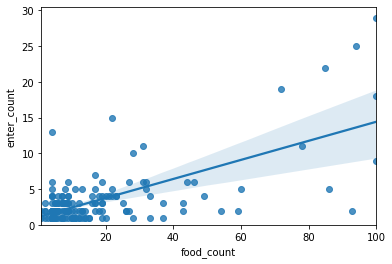

In [73]:
sns.regplot(x="food_count", y="enter_count", data=df_main)
plt.ylim(0,)


We can see there is a positive correlation between Restaurant location and entertainment location

##### Correlation Graph of  Area_size and Population

(0.0, 23359.35)

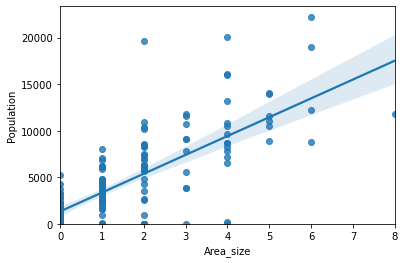

In [74]:
sns.regplot(x="Area_size", y="Population", data=df_main)
plt.ylim(0,)


We can see there is a positive correlation between Area_size and Population

##### Correlation Graph of Population and entertainment location

(0.0, 30.46125616619076)

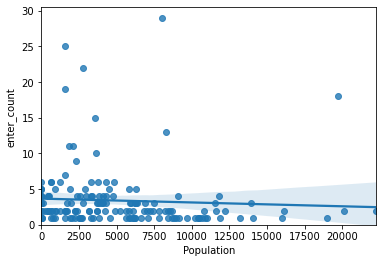

In [75]:
sns.regplot(x="Population", y="enter_count", data=df_main)
plt.ylim(0,)

We can see there is a Weak negative correlation between population and entertainment location

##### Correlation Graph of Population and Restaurant location

(0.0, 105.14195432512282)

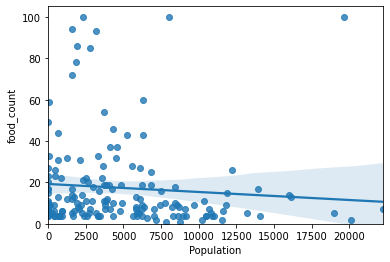

In [76]:
sns.regplot(x="Population", y="food_count", data=df_main)
plt.ylim(0,)

We can see there is a Weak negative correlation between population and entertainment location


Observing from the correlations table, we can observe the Neighbourhood population and area size do not impact the Location of restaurant and entertainment venues. 

Weird! I know right! But that is what we can observe from the data. So moving forward, we do not need population or area size data for our analysis.

The second step in our analysis is to Narrow down the neighbourhood with the highest number of restaurants and entertainment venues.

Luckily our data has information on the sector each Neighbourhood is located. So what we can do is divide up our Neighbourhod via each sector and locate the sector with the best data qualities we desire.

#### Step 2: Grouping the Data

In [77]:
df_sector = df_main[['Neighborhood','Sector','food_count','enter_count']]
print ('Sector Shape is ',df_sector.shape)
df_sector.head()

Sector Shape is  (165, 4)


Neighborhood     Sector  food_count  enter_count
0                     Calgary, Abbeydale  Northeast           5            1
1                        Calgary, Acadia      South           7            1
2  Calgary, Albert Park/Radisson Heights       East          19            1
3              Calgary, Alyth/Bonnybrook     Centre           7            1
4                   Calgary, Arbour Lake  Northwest           5            2

In order to view the number of Neighborhood in each sector

In [78]:
Neighborhood_count = df_sector['Sector'].value_counts().to_frame('neighborhood_count')

Neighborhood_count.reset_index(inplace=True)


Neighborhood_count.rename(columns = {'index':'Sector'}, inplace = True)


Neighborhood_count



Sector  neighborhood_count
0     Centre                  53
1      South                  30
2  Northeast                  18
3       West                  18
4  Northwest                  16
5      North                  13
6  Southeast                  10
7       East                   7

From this, we can see that the Center Sector has the most neighborhoods, indicating it might have the highest number of restaurants and entertainment locations as viewed from the map above.

In [79]:
df_sector = df_sector.groupby(['Sector'],as_index=False).sum()
df_sector

Sector  food_count  enter_count
0     Centre        1763          300
1       East          77           15
2      North         110           28
3  Northeast         283           34
4  Northwest         119           27
5      South         316           87
6  Southeast          71           27
7       West         133           45

Using Bar Chart, lets look at the distribution of Restaurant and Entertainment Venues in each Sector

##### Bar Chart for Sector vs Number of Restaurant and Entertainment Venues

Text(0, 0.5, 'Number of Restaurant and Entertainment Venues')

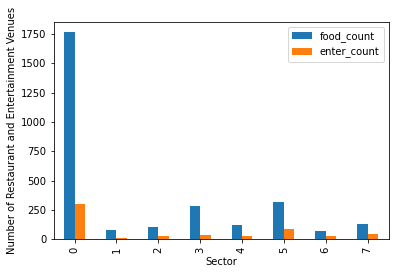

In [80]:
df_sector.plot(kind = 'bar')

plt.xlabel('Sector')
plt.ylabel('Number of Restaurant and Entertainment Venues')

Hmmmm....What Sector has that much restaurants and entertainment venues ?

In [81]:
print(df_sector.iloc[0])

Sector         Centre
food_count       1763
enter_count       300
Name: 0, dtype: object


We can see that Neighbourhoods in the Center sector has the most Restaurant and entertainment venues!

So moving on, we narrow down our focus to Neighbourhoods in the Center Sector

#### Step 3: Narrowing the analysis down to Neighbourhood in the Center sector

In [82]:
df_centre = df_main.loc[df_main['Sector'] == 'Centre']


df_centre.reset_index(inplace=True)

df_centre = df_centre[['Neighborhood','Quadrant','Sector', 'Type', 'Population', 'Area_size', 'Longitude','Latitude', 'food_count','enter_count']]

print('The shape of the Centre Sector Data',df_centre.shape)

df_centre.head()

The shape of the Centre Sector Data (53, 10)


Neighborhood Quadrant  Sector         Type  Population  \
0  Calgary, Alyth/Bonnybrook       SE  Centre   Industrial          16   
1       Calgary, Banff Trail       NW  Centre  Residential        3837   
2          Calgary, Bankview       SW  Centre  Residential        5221   
3          Calgary, Bel-Aire       SW  Centre  Residential         424   
4          Calgary, Beltline    SW/SE  Centre  Residential       19681   

   Area_size   Longitude   Latitude  food_count  enter_count  
0          3 -114.024294  51.016669           7            1  
1          1 -114.111647  51.071462          19            4  
2          0 -114.099518  51.033887          43            2  
3          0 -114.086811  50.999693          23            4  
4          2 -114.072593  51.040498         100           18

In [83]:
df_centre.dtypes

Neighborhood     object
Quadrant         object
Sector           object
Type             object
Population        int64
Area_size         int64
Longitude       float64
Latitude        float64
food_count        int64
enter_count       int64
dtype: object

Observing the correlation in our data


In [84]:
df_centre[['Population','Area_size','food_count','enter_count']].corr()

Population  Area_size  food_count  enter_count
Population     1.000000   0.280217    0.392478     0.296457
Area_size      0.280217   1.000000   -0.217071    -0.101634
food_count     0.392478  -0.217071    1.000000     0.687017
enter_count    0.296457  -0.101634    0.687017     1.000000

##### Correlation Graph of Restaurant location and entertainment location

(0.0, 30.455201110313144)

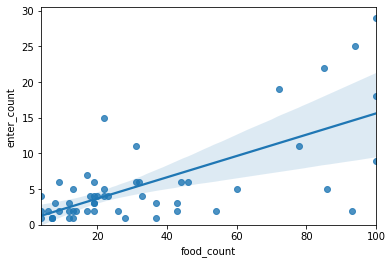

In [85]:
sns.regplot(x="food_count", y="enter_count", data=df_centre)
plt.ylim(0,)


We can see there is a positive correlation between Restaurant location and entertainment location

Observing the center Neighborhoods on a map

In [86]:
address = 'Calgary'

geolocator = Nominatim(user_agent="to_chrome")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


##### Map of the centre of Calgary with it's Neighbourhoods

In [87]:
map_centre = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue in zip(df_centre['Latitude'], df_centre['Longitude'], df_centre['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_centre)
    
map_centre

##### Step 4: Clusterning the Center Sector using K-Means Clustering

Using the matplotlib libraries to graph values of k. Use the elbow method to select a k value.

In [88]:
df_centre_cluster = df_centre[['food_count','enter_count']]
df_centre_cluster.head(3)

food_count  enter_count
0           7            1
1          19            4
2          43            2

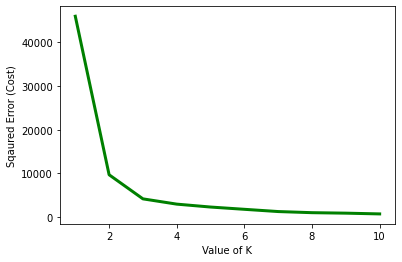

In [89]:
import matplotlib.pyplot as plt  
from matplotlib import style 

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(df_centre_cluster) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot

From the graph, we can observe a clear K value of approximately 3, so we select 3 as our K value.

##### Normalizing over the standard deviation

Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [90]:
from sklearn.preprocessing import StandardScaler
X = df_centre_cluster.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.91248972, -0.74537703],
       [-0.49557631, -0.26555943],
       [ 0.3382505 , -0.58543783],
       [-0.35660518, -0.26555943],
       [ 2.31858918,  1.97358939],
       [-0.18289126, -0.74537703],
       [-1.01671807, -0.74537703],
       [-1.01671807, -0.58543783],
       [-0.91248972, -0.74537703],
       [-0.49557631, -0.42549863],
       [ 2.11013247,  3.09316381],
       [ 1.8321902 , -0.10562023],
       [ 0.92887782, -0.10562023],
       [ 2.31858918,  3.73292061],
       [ 1.79744742,  2.6133462 ],
       [ 2.31858918,  0.53413658],
       [ 1.55424793,  0.85401498],
       [-0.70403302, -0.58543783],
       [-0.04392012,  0.05431897],
       [-0.87774693, -0.42549863],
       [-0.84300415,  0.05431897],
       [ 0.3382505 , -0.42549863],
       [-0.5303191 , -0.26555943],
       [-0.39134796,  1.49377179],
       [-0.49557631, -0.58543783],
       [ 2.07538969, -0.58543783],
       [-0.07866291,  0.05431897],
       [-0.46083353, -0.26555943],
       [-1.01671807,

##### Modeling

Lets apply k-means on our dataset, and take look at cluster labels.

In [91]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 2 0 1 2 0 0 0 0 1 1 2 1 1 1 1 0 2 0 0 2 0 0 0 1 2 0 0 2 2 0 1 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0]


##### Insights

We assign the labels to each row in dataframe of df_centre and df_centre_cluster

In [92]:
df_centre_cluster["Clus_km"] = labels
df_centre_cluster.head(3)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


food_count  enter_count  Clus_km
0           7            1        0
1          19            4        0
2          43            2        2

In [93]:
df_centre["Clus_km"] = labels
df_centre.head(3)

Neighborhood Quadrant  Sector         Type  Population  \
0  Calgary, Alyth/Bonnybrook       SE  Centre   Industrial          16   
1       Calgary, Banff Trail       NW  Centre  Residential        3837   
2          Calgary, Bankview       SW  Centre  Residential        5221   

   Area_size   Longitude   Latitude  food_count  enter_count  Clus_km  
0          3 -114.024294  51.016669           7            1        0  
1          1 -114.111647  51.071462          19            4        0  
2          0 -114.099518  51.033887          43            2        2

So df_centre is the dataframe with each Neighbourhood respective cluster and df_centre_cluster is for further analysis and visualization

In df_centre_cluster, we can easily check the centroid values by averaging the features in each cluster.

In [94]:
df_centre_cluster.groupby('Clus_km').mean()

food_count  enter_count
Clus_km                         
0         14.064516     3.354839
1         89.777778    15.555556
2         39.923077     4.307692

Now, lets look at the distribution of Neighborhood based on the number of restaurant and entertainment venues they have:

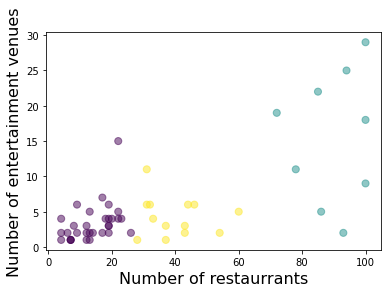

In [95]:
area = 50
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Number of restaurrants', fontsize=16)
plt.ylabel('Number of entertainment venues', fontsize=16)


plt.show()

#### Dividing up the Center Sector based on their cluster

In [96]:
df_centre.columns

Index(['Neighborhood', 'Quadrant', 'Sector', 'Type', 'Population', 'Area_size',
       'Longitude', 'Latitude', 'food_count', 'enter_count', 'Clus_km'],
      dtype='object')

In [97]:
cluster_1 = df_centre.loc[df_centre['Clus_km'] == 0]
cluster_1.reset_index(inplace=True)
cluster_1 = cluster_1[['Neighborhood', 'Quadrant', 'Sector', 'Type', 'Population', 'Area_size',
    'Longitude', 'Latitude', 'food_count', 'enter_count', 'Clus_km']]

cluster_2 = df_centre.loc[df_centre['Clus_km'] == 1]
cluster_2.reset_index(inplace=True)
cluster_2 = cluster_2[['Neighborhood', 'Quadrant', 'Sector', 'Type', 'Population', 'Area_size',
    'Longitude', 'Latitude', 'food_count', 'enter_count', 'Clus_km']]

cluster_3 = df_centre.loc[df_centre['Clus_km'] == 2]
cluster_3.reset_index(inplace=True)
cluster_3 = cluster_3[['Neighborhood', 'Quadrant', 'Sector', 'Type', 'Population', 'Area_size',
    'Longitude', 'Latitude', 'food_count', 'enter_count', 'Clus_km']]

cluster_1.head(2)

Neighborhood Quadrant  Sector         Type  Population  \
0  Calgary, Alyth/Bonnybrook       SE  Centre   Industrial          16   
1       Calgary, Banff Trail       NW  Centre  Residential        3837   

   Area_size   Longitude   Latitude  food_count  enter_count  Clus_km  
0          3 -114.024294  51.016669           7            1        0  
1          1 -114.111647  51.071462          19            4        0

In [98]:
cluster_2.head(2)

Neighborhood Quadrant  Sector         Type  Population  Area_size  \
0   Calgary, Beltline    SW/SE  Centre  Residential       19681          2   
1  Calgary, Chinatown    SW/SE  Centre  Residential        1577          0   

    Longitude   Latitude  food_count  enter_count  Clus_km  
0 -114.072593  51.040498         100           18        1  
1 -114.062611  51.050654          94           25        1

In [99]:
cluster_3.head(2)

Neighborhood Quadrant  Sector         Type  Population  \
0              Calgary, Bankview       SW  Centre  Residential        5221   
1  Calgary, Bridgeland/Riverside    NE/SE  Centre  Residential        5594   

   Area_size   Longitude   Latitude  food_count  enter_count  Clus_km  
0          0 -114.099518  51.033887          43            2        2  
1          3 -114.044310  51.053801          28            1        2

Let's look at the size of each cluster

In [100]:
print('The shape of Cluster 1 is:',cluster_1.shape )
print('The shape of Cluster 2 is:',cluster_2.shape )
print('The shape of Cluster 3 is:',cluster_3.shape )

The shape of Cluster 1 is: (31, 11)
The shape of Cluster 2 is: (9, 11)
The shape of Cluster 3 is: (13, 11)


#### Step 5: Visualizing each cluster via bar chart to see the cluster with the highest number of Restaurants and Entertainment Venues

Creating a new data frame for each cluster's Bar Chart

In [101]:
cluster_1_1 = cluster_1[['Neighborhood','food_count', 'enter_count',]]
cluster_2_2 = cluster_2[['Neighborhood','food_count', 'enter_count',]]
cluster_3_3 = cluster_3[['Neighborhood','food_count', 'enter_count',]]

cluster_1_1.head()

Neighborhood  food_count  enter_count
0  Calgary, Alyth/Bonnybrook           7            1
1       Calgary, Banff Trail          19            4
2          Calgary, Bel-Aire          23            4
3         Calgary, Britannia           4            1
4  Calgary, Burns Industrial           4            2

##### Cluster 1 Bar Chart

Text(0, 0.5, 'Number of Restaurant and Entertainment Venues')

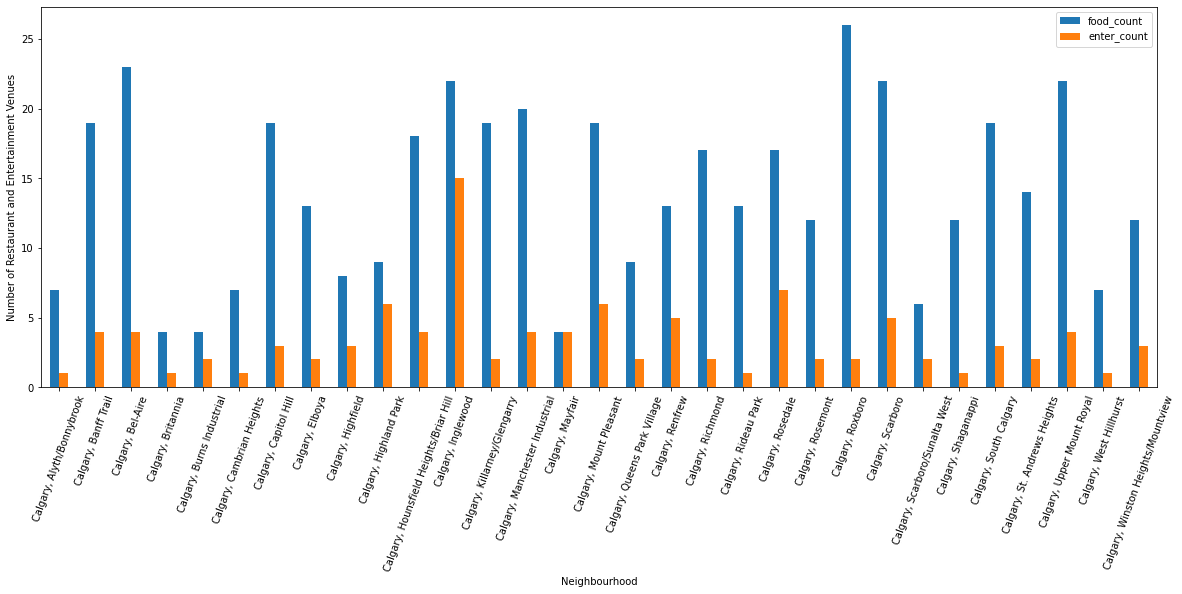

In [102]:
cluster_1_1.plot(x='Neighborhood', kind='bar', figsize=(20,7), rot=70)

plt.xlabel('Neighbourhood')
plt.ylabel('Number of Restaurant and Entertainment Venues')

##### Cluster 2 Bar Chart

Text(0, 0.5, 'Number of Restaurant and Entertainment Venues')

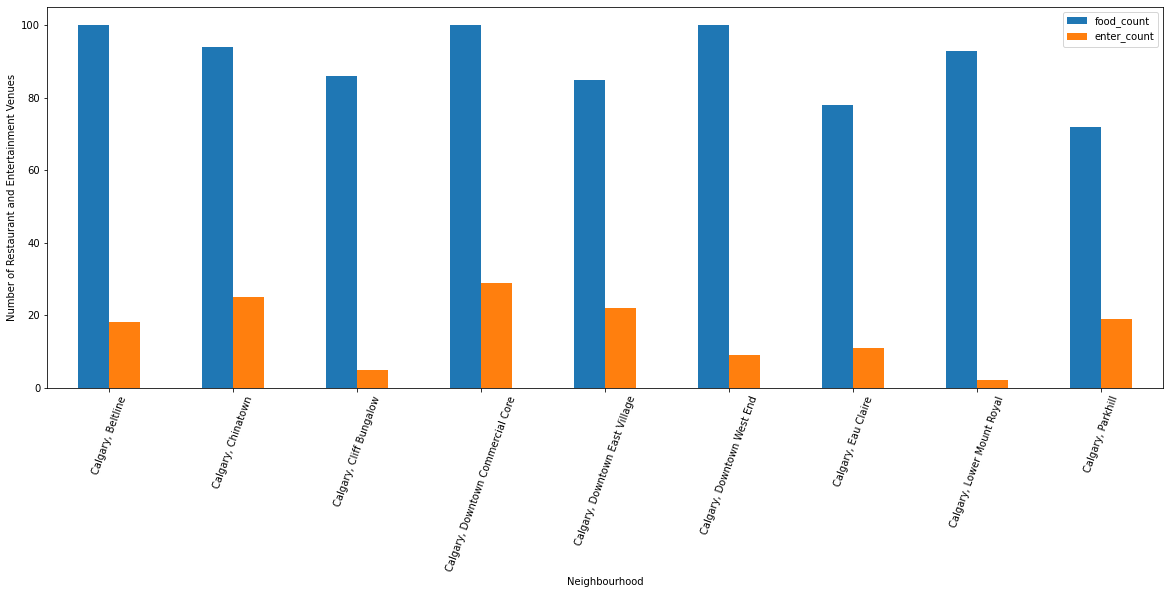

In [103]:
cluster_2_2.plot(x='Neighborhood', kind='bar', figsize=(20,7), rot=70)

plt.xlabel('Neighbourhood')
plt.ylabel('Number of Restaurant and Entertainment Venues')

##### Cluster 3 Bar Chart

Text(0, 0.5, 'Number of Restaurant and Entertainment Venues')

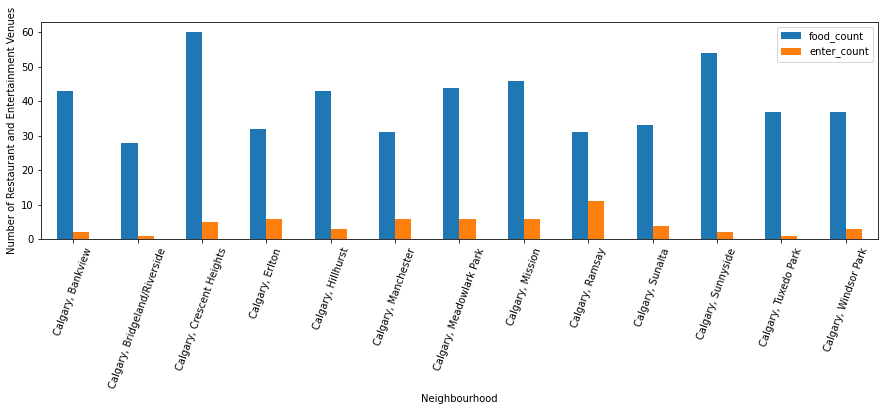

In [104]:
cluster_3_3.plot(x='Neighborhood', kind='bar', figsize=(15,4), rot=70)

plt.xlabel('Neighbourhood')
plt.ylabel('Number of Restaurant and Entertainment Venues')

##### Result of Analysis

As we can see, Although Cluster 2 and 3 look similar, Cluster 2 has a higher count of restaurant and enter tainment location.

From Cluster 2, we see that Calgary Downtown Commercial core has the overall highest number of Restaurants and entertainment location.

So, lets view the attributes of Calgary Downtown Commercial core.

In [105]:
cluster_2

Neighborhood Quadrant  Sector         Type  \
0                  Calgary, Beltline    SW/SE  Centre  Residential   
1                 Calgary, Chinatown    SW/SE  Centre  Residential   
2            Calgary, Cliff Bungalow       SW  Centre  Residential   
3  Calgary, Downtown Commercial Core    SW/SE  Centre  Residential   
4     Calgary, Downtown East Village       SE  Centre  Residential   
5         Calgary, Downtown West End       SW  Centre  Residential   
6                Calgary, Eau Claire       SW  Centre  Residential   
7         Calgary, Lower Mount Royal       SW  Centre  Residential   
8                  Calgary, Parkhill       SW  Centre  Residential   

   Population  Area_size   Longitude   Latitude  food_count  enter_count  \
0       19681          2 -114.072593  51.040498         100           18   
1        1577          0 -114.062611  51.050654          94           25   
2        1936          0 -114.073833  51.034436          86            5   
3        8015          1 -114.067199  51.047378         100           29   
4        2782          0 -114.050643  51.046496          85           22   
5        2322          0 -114.083420  51.047554         100            9   
6        1851          0 -114.070312  51.052579          78           11   
7        3180          0 -114.087139  51.036645          93            2   
8        1592          0 -114.062589  51.053423          72           19   

   Clus_km  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1

In [106]:
Down_Town = df_centre.loc[df_centre['Neighborhood'] == 'Calgary, Downtown Commercial Core']
Down_Town

Neighborhood Quadrant  Sector         Type  \
13  Calgary, Downtown Commercial Core    SW/SE  Centre  Residential   

    Population  Area_size   Longitude   Latitude  food_count  enter_count  \
13        8015          1 -114.067199  51.047378         100           29   

    Clus_km  
13        1

Lets view it on a map

##### Map of Calgary, Downtown Commercial Core

In [107]:
address = 'Calgary, Downtown Commercial Core'

geolocator = Nominatim(user_agent="to_chrome")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary, Downtown Commercial Core are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary, Downtown Commercial Core are 51.0473777, -114.0671989.


In [108]:
map_downtown = folium.Map(location=[latitude, longitude], zoom_start=13.5)
    
map_downtown

Beautifull! Looking at the map closely, Downtown commercial core

##### Issue with analysis: Area Size Limitation

As we can see, the area size of Calgary, Downtown Commercial Core is 1.8 km squared. From research carried out, size of Calgary, Downtown Commercial Core is just about 444 acres (1.8 km squared) which restricts the available amount of land to build an amusement park. The size of calaway park is about 160 acres (0.647497 km squared), so we get a rough idea of how much land size we should look out for. Downtown areas of city are also known to contain high rise buidings used for office spaces etc and is limited to the available space.Since Center Sector has the highest amount of Restaurant and Entertainment venies, we expand our search for a location to build our amusement park back to the center sector. 


##### Solution to analysis: Ranking our Data
We can find the best location to build the amusement park by ranking the Centre Sector based on Area Size, Restaurant, and entertainment venues

#### Step 6: Ranking our data based on Area Size

Let us first rank our data based on area size alone. We create a new data frame called df_center_rank1

In [109]:
df_centre_rank1= df_centre[['Neighborhood', 'Quadrant', 'Sector', 'Type', 'Population', 'Area_size',
    'Longitude', 'Latitude', 'food_count', 'enter_count', 'Clus_km']]
df_centre_rank1 = df_centre_rank1.sort_values('Area_size',ascending=False)

df_centre_rank1.reset_index(inplace=True)

del df_centre_rank1['index']

df_centre_rank1.head(8)

Neighborhood Quadrant  Sector         Type  \
0      Calgary, Manchester Industrial    SE/SW  Centre   Industrial   
1           Calgary, Alyth/Bonnybrook       SE  Centre   Industrial   
2       Calgary, Bridgeland/Riverside    NE/SE  Centre  Residential   
3  Calgary, Winston Heights/Mountview       NE  Centre  Residential   
4                   Calgary, Beltline    SW/SE  Centre  Residential   
5                    Calgary, Renfrew       NE  Centre  Residential   
6                  Calgary, Inglewood       SE  Centre  Residential   
7                  Calgary, Hillhurst       NW  Centre  Residential   

   Population  Area_size   Longitude   Latitude  food_count  enter_count  \
0           0          4 -114.056644  51.011507          20            4   
1          16          3 -114.024294  51.016669           7            1   
2        5594          3 -114.044310  51.053801          28            1   
3        3891          3 -114.047588  51.072303          12            3   
4       19681          2 -114.072593  51.040498         100           18   
5        5846          2 -114.041687  51.062572          13            5   
6        3564          2 -114.027489  51.038800          22           15   
7        6291          2 -114.095564  51.055414          43            3   

   Clus_km  
0        0  
1        0  
2        2  
3        0  
4        1  
5        0  
6        0  
7        2

Based on this dataframe, we see the Largest Neighbourhood by area size is Manchester Industrial, but it is an industrial area with zero population. But looking at the data frame, we see Beltline which has the 5th Largest Neighbourhood by area size of 2km squared and a high number of restaurant and entertainment location. This can be a good Neighbourhood to build our new Amusement park. So let's rank based on area size, restaurant location and entertainment location. 

The new data frame would be named df_center_rank2

In [110]:
df_centre_rank2= df_centre[['Neighborhood', 'Quadrant', 'Sector', 'Type', 'Population', 'Area_size',
    'Longitude', 'Latitude', 'food_count', 'enter_count', 'Clus_km']]

col1 = df_centre_rank2["Area_size"].astype(str) 
col2 = df_centre_rank2["food_count"].astype(str)
col3 = df_centre_rank2["enter_count"].astype(str)
df_centre_rank2['Rank'] = (col1+col2+col3).astype(int).rank(method='dense', ascending=False).astype(int)

df_centre_rank2 = df_centre_rank2.sort_values('Rank',ascending=True)

df_centre_rank2.reset_index(inplace=True)

del df_centre_rank2['index']

df_centre_rank2.head(8)

Neighborhood Quadrant  Sector         Type  \
0                  Calgary, Beltline    SW/SE  Centre  Residential   
1  Calgary, Downtown Commercial Core    SW/SE  Centre  Residential   
2                 Calgary, Inglewood       SE  Centre  Residential   
3                    Calgary, Ramsay       SE  Centre  Residential   
4                 Calgary, Chinatown    SW/SE  Centre  Residential   
5     Calgary, Downtown East Village       SE  Centre  Residential   
6                Calgary, Eau Claire       SW  Centre  Residential   
7                  Calgary, Parkhill       SW  Centre  Residential   

   Population  Area_size   Longitude   Latitude  food_count  enter_count  \
0       19681          2 -114.072593  51.040498         100           18   
1        8015          1 -114.067199  51.047378         100           29   
2        3564          2 -114.027489  51.038800          22           15   
3        2110          1 -114.041219  51.037727          31           11   
4        1577          0 -114.062611  51.050654          94           25   
5        2782          0 -114.050643  51.046496          85           22   
6        1851          0 -114.070312  51.052579          78           11   
7        1592          0 -114.062589  51.053423          72           19   

   Clus_km  Rank  
0        1     1  
1        1     2  
2        0     3  
3        2     4  
4        1     5  
5        1     6  
6        1     7  
7        1     8

Beautiful!!

From our ranked data set, according to area size, restaurant and entertainment location, The Beltline Neighbourhood is the best Loction to build our new amusement park.

##### Map of Beltline Calgary

In [111]:
address = 'Calgary'

geolocator = Nominatim(user_agent="to_chrome")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [112]:
locations = df_centre[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)

map = folium.Map(location=[latitude, longitude], zoom_start=13)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Neighborhood'][point]).add_to(map)
map

We can see that Beltline is Located at the heart of the city right below the Downtown Commercial core

#### THE BEST NEIGHBOURHOOD IS BELTLINE!!!!!!!!!!!

### Methodolgy

To complete the analysis, there were several steps of data gathering, cleaning, and analysis. Data was pulled from Wikipedia and the FourSquare API, cleaned using the padas and BeautifulSoup libraries, and stored into pandas dataframes. Data was assembled to align latitude and longitude coordinates with neighborhood names in Calgary, and that was mapped using the folium library.

The Foursquare API was used to find the (up to) 100 closest restaurants and entertainment locations to each neighborhood center and their locations. The data pertaining to the number of restaurant and entertainment locations for each Neighbourhood was stored in a data frame, providing us with useful information about the number of restaurant and entertainment locations for each Neighbourhood. The new data frame was grouped by sector (North, South, East, West, Northeast, Northwest, Southwest, and center), and the sector with the highest number of restaurant and entertainment location was selected. The Neighbourhoods in Center Sector was selected for further analysis. In order to find out the factors that are correlated to the location of entertainment venues (because an amusement park is a source of entertainment and fun), correlation of the data was carried out for population, area size, restaurant count, and entertainment venues count. A positive correlation was found between the number of restaurant and entertainment venues in a neighbourhood.

The Neighbourhood in the center sector was then clustered using K-means Clustering. The 'elbow method' was used to determine the number of clusters used. The clutered data was then divided and analyzed to identify the neighbourhood with the highest number of restaurant and entertainment locations. Calgary, Downtown Commercial Core was selected as the best Neighbourhood. But unfortunately, Calgary, Downtown Commercial Core is a small Neighbourhood and would not be the best candidate for the construction of a large amusement park. So the Neighbourhood in the Center Sector was then ranked based on area size, restaurant count, and entertainment venues count. Based on the ranking of the data, Beltline having an area size of 2km squared was selected as the best Neighbourhood.




### Results

Comparing our analysis to the questions initially asked;

1. From available data, is there a relationship between population and entertainment venues in various neighbourhoods
    
    Answer: No correlation exists between population and entertainment venues in various neighbourhoods
    
    
2. what is the relationship between current entertainment venues and number of restaurants in various neighbourhoods
    
    Answer: There is a positive correlation between entertainment venues and number of restaurants in a Neighbourhood
    
    
3. Are entertainment venues closer to the city center ?
    
    Answer: Yes entertainment venues are more clustered towards the center of the city
    
    
4. Are entertainment venues located closer to more populated areas or less populated areas

    Answer: There is no correlation between entertainment venues and population of a Neighbourhood.

Based on initial analysis, Calgary, Downtown Commercial Core was selected as the best Neighbourhood. But unfortunately, Calgary, Downtown Commercial Core is a small Neighbourhood and would not be the best candidate for the construction of a large amusement park based on it's area size. Based on the ranking of the data (area size, restaurant count, and entertainment venues count), Beltline having an area size of 2km squared was selected as the best Neighbourhood.

### Discussion

Based on the analysis, the Beltline Neighbourhood was selected as the best Neighbourhood. Although this analysis indicates it as being the best Neighbourhood, further research would need to be carried out along with the City of Calgary, in order to determine if there is a city plan for that Neighbour hood, and if sufficient land exists for the construction of an amusement park. Several enquiries and permits would also be needed in order to determine if potential investor could move forward on determining the best Neighbourood to build the new amusement park.

### Conclusion

Calgary is the 4th largest city in Canada by population, with the province of Alberta having the third largest GDP in Canada. It is a beautiful city and building an amusement park can be a very profitable business to invest in. A big amusement park with a lot of rides, and fun activities like Disney World, could be a source of tourist attraction, which could potentially increase the economy of Calgary.